# Notebook 03: Model Testing and Optimization 

## Aims

Test different basic models to determine best classification model for further optimisation.

Weak learners that will be tested:
* KNN
* Decision Tree
* Logistic Regression
* SVM
* Naive Bayes

We will determine f1 score of each model and compare with baseline model.

## Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import AdaBoostClassifier
from logitboost import LogitBoost
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

# for gridsearch
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter('ignore')

## Load Data and Preprocessing

### Load data

In [5]:
df = pd.read_csv('data/train.csv')
df.head(10)

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_statue_mode,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean,counter_type_mode
0,60,11,101,0.0,35.0,352.400000,10.571429,0.000000,0.000000,11.000000,1.335667e+06,0,203.685714,6.971429,1.0,362.971429,4.628571,0
1,69,11,107,0.0,37.0,557.540541,0.000000,0.000000,0.000000,11.000000,6.789020e+05,0,203.000000,7.216216,1.0,557.540541,4.324324,0
2,62,11,301,0.0,18.0,798.611111,37.888889,0.000000,0.000000,11.000000,5.727650e+05,0,203.222222,7.055556,1.0,836.500000,6.444444,0
3,69,11,105,0.0,20.0,1.200000,0.000000,0.000000,0.000000,11.000000,2.078000e+03,0,413.000000,6.150000,1.0,1.200000,4.200000,0
4,62,11,303,0.0,14.0,663.714286,104.857143,117.357143,36.714286,11.000000,1.957500e+04,0,207.000000,8.857143,1.0,922.642857,3.714286,0
5,69,11,103,0.0,48.0,352.104167,10.437500,3.770833,0.000000,22.479167,8.149729e+05,0,124.625000,7.708333,1.0,366.312500,4.000000,0
6,62,11,309,0.0,40.0,280.025000,6.550000,0.000000,0.000000,25.500000,4.446350e+04,0,209.000000,7.975000,1.0,286.575000,3.700000,[0 1]
7,60,11,101,0.0,78.0,327.500000,0.923077,0.000000,0.000000,25.128205,5.904181e+05,0,106.538462,7.025641,1.0,328.423077,3.871795,0
8,62,11,301,0.0,2.0,112.500000,0.000000,0.000000,0.000000,11.000000,1.441290e+05,0,413.000000,7.500000,1.0,112.500000,4.000000,0
9,60,11,101,0.0,5.0,850.800000,1629.200000,320.000000,4882.000000,11.000000,5.868000e+05,0,467.000000,9.000000,1.0,7682.000000,4.000000,0


### Preprocessing of Data

In [6]:
# dropping counter_statue_mode and counter_type_mode
df_original = df
df.drop(['counter_type_mode', 'counter_statue_mode'], axis=1, inplace=True)
df.head(10)

,disrict,client_catg,region,target,1transactions_count,consommation_level_1_mean,consommation_level_2_mean,consommation_level_3_mean,consommation_level_4_mean,tarif_type_mean,counter_number_mean,counter_code_mean,reading_remarque_mean,counter_coefficient_mean,delta_index_mean,months_number_mean
0,60,11,101,0.0,35.0,352.400000,10.571429,0.000000,0.000000,11.000000,1.335667e+06,203.685714,6.971429,1.0,362.971429,4.628571
1,69,11,107,0.0,37.0,557.540541,0.000000,0.000000,0.000000,11.000000,6.789020e+05,203.000000,7.216216,1.0,557.540541,4.324324
2,62,11,301,0.0,18.0,798.611111,37.888889,0.000000,0.000000,11.000000,5.727650e+05,203.222222,7.055556,1.0,836.500000,6.444444
3,69,11,105,0.0,20.0,1.200000,0.000000,0.000000,0.000000,11.000000,2.078000e+03,413.000000,6.150000,1.0,1.200000,4.200000
4,62,11,303,0.0,14.0,663.714286,104.857143,117.357143,36.714286,11.000000,1.957500e+04,207.000000,8.857143,1.0,922.642857,3.714286
5,69,11,103,0.0,48.0,352.104167,10.437500,3.770833,0.000000,22.479167,8.149729e+05,124.625000,7.708333,1.0,366.312500,4.000000
6,62,11,309,0.0,40.0,280.025000,6.550000,0.000000,0.000000,25.500000,4.446350e+04,209.000000,7.975000,1.0,286.575000,3.700000
7,60,11,101,0.0,78.0,327.500000,0.923077,0.000000,0.000000,25.128205,5.904181e+05,106.538462,7.025641,1.0,328.423077,3.871795
8,62,11,301,0.0,2.0,112.500000,0.000000,0.000000,0.000000,11.000000,1.441290e+05,413.000000,7.500000,1.0,112.500000,4.000000
9,60,11,101,0.0,5.0,850.800000,1629.200000,320.000000,4882.000000,11.000000,5.868000e+05,467.000000,9.000000,1.0,7682.000000,4.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    135493 non-null  int64  
 1   client_catg                135493 non-null  int64  
 2   region                     135493 non-null  int64  
 3   target                     135493 non-null  float64
 4   1transactions_count        128364 non-null  float64
 5   consommation_level_1_mean  128364 non-null  float64
 6   consommation_level_2_mean  128364 non-null  float64
 7   consommation_level_3_mean  128364 non-null  float64
 8   consommation_level_4_mean  128364 non-null  float64
 9   tarif_type_mean            128364 non-null  float64
 10  counter_number_mean        128364 non-null  float64
 11  counter_code_mean          128364 non-null  float64
 12  reading_remarque_mean      128364 non-null  float64
 13  counter_coefficient_mean   12

### Drop rows with missing values

Due to the merging of invoice data after 2005 and client data, there are some empty values for clients that did not have any transactions after 2005.
We will drop these rows because they are not important for our modeling.

In [8]:
#dropping rows with empty values
df.dropna(axis=0, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128364 entries, 0 to 135491
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   disrict                    128364 non-null  int64  
 1   client_catg                128364 non-null  int64  
 2   region                     128364 non-null  int64  
 3   target                     128364 non-null  float64
 4   1transactions_count        128364 non-null  float64
 5   consommation_level_1_mean  128364 non-null  float64
 6   consommation_level_2_mean  128364 non-null  float64
 7   consommation_level_3_mean  128364 non-null  float64
 8   consommation_level_4_mean  128364 non-null  float64
 9   tarif_type_mean            128364 non-null  float64
 10  counter_number_mean        128364 non-null  float64
 11  counter_code_mean          128364 non-null  float64
 12  reading_remarque_mean      128364 non-null  float64
 13  counter_coefficient_mean   12

### Remove duplicated

In [9]:
#checking for duplicates
df.duplicated().value_counts()

False    128363
True          1
dtype: int64

In [10]:
#dropping duplicates
df = df.drop_duplicates()

In [11]:
df.shape

(128363, 16)

### Train test split

In [12]:
X=df.drop('target', axis=1)
y=df.target
X_train, X_test, y_train, y_test= train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Model tests

In [13]:
#initializing dictionary to save results from each model for later comparison
model_results = {}

### Baseline as Comparison

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94     24160
         1.0       0.06      0.06      0.06      1513

    accuracy                           0.89     25673
   macro avg       0.50      0.50      0.50     25673
weighted avg       0.89      0.89      0.89     25673



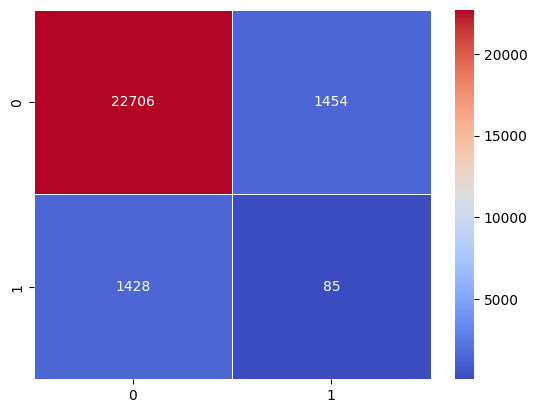

In [68]:
#Baseline as comparison
dummy_clf = DummyClassifier(strategy="stratified", random_state=42)
dummy_clf.fit(X_train, y_train)
y_pred=dummy_clf.predict(X_test)
print(classification_report(y_test, y_pred))

# saving f1 score to dictionary for comparison
report = classification_report(y_test, y_pred)
model_results['baseline_model'] = classification_report(y_test, y_pred, output_dict=True)['1.0']['f1-score']

#Error Analysis of best estimator from randomized search by checking confusion matrix
cm=confusion_matrix(y_test, y_pred)
sns.heatmap(cm, linewidths=.5, annot=True, cmap='coolwarm', fmt='.0f');

### Logistic Regression

In [15]:
# Logistic Regression
dict = {0:20, 1:2000}
lr = LogisticRegression(class_weight=dict)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print(classification_report(y_test, y_pred_lr))

# saving f1 score to dictionary for comparison
model_results['logistic_regression'] = classification_report(y_test, y_pred_lr, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     24160
         1.0       0.06      1.00      0.11      1513

    accuracy                           0.06     25673
   macro avg       0.03      0.50      0.06     25673
weighted avg       0.00      0.06      0.01     25673



### KNN

In [16]:
#KNN
knn = KNeighborsClassifier(n_neighbors=10, weights='distance', n_jobs=-1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
print(classification_report(y_test, y_pred_knn))

# saving f1 score to dictionary for comparison
model_results['knn'] = classification_report(y_test, y_pred_knn, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.43      0.11      0.18      1513

    accuracy                           0.94     25673
   macro avg       0.69      0.55      0.57     25673
weighted avg       0.92      0.94      0.92     25673



### Decision Tree

In [17]:
#Decision Tree
tree = DecisionTreeClassifier(criterion = "gini") 
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))

# saving f1 score to dictionary for comparison
model_results['tree'] = classification_report(y_test, y_pred_tree, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     24160
         1.0       0.21      0.23      0.22      1513

    accuracy                           0.90     25673
   macro avg       0.58      0.59      0.58     25673
weighted avg       0.91      0.90      0.90     25673



In [18]:
#Checking parameters of decision tree, e.g. depth of tree
tree.get_depth()

46

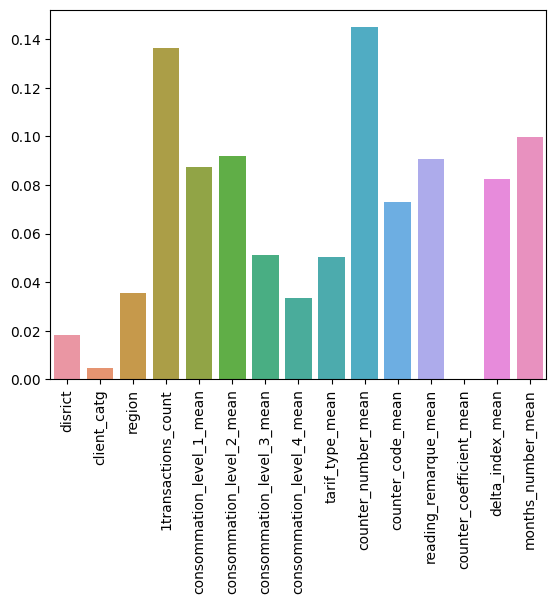

In [19]:
#Checking for feature importance in decision tree modelling 
sns.barplot(x=X.columns, y=tree.feature_importances_)
plt.xticks(rotation=90);

### SVM

In [20]:
#support vector machine
#model takes more than 1hour to finish
'''vec = SVC(kernel='linear', C=1, gamma='auto')
vec.fit(X_train.iloc[:1500], y_train.iloc[:1500])
y_pred_vec = vec.predict(X_test)
print(classification_report(y_test, y_pred_vec))

# saving f1 score to dictionary for comparison
model_results['svm'] = classification_report(y_test, y_pred_vec, output_dict=True)['1.0']['f1-score'] '''

"vec = SVC(kernel='linear', C=1, gamma='auto')\nvec.fit(X_train.iloc[:1500], y_train.iloc[:1500])\ny_pred_vec = vec.predict(X_test)\nprint(classification_report(y_test, y_pred_vec))\n\n# saving f1 score to dictionary for comparison\nmodel_results['svm'] = classification_report(y_test, y_pred_vec, output_dict=True)['1.0']['f1-score'] "

### Naive Bayes

In [21]:
#Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
print(classification_report(y_test, y_pred_gnb))

# saving f1 score to dictionary for comparison
model_results['Naive_Bayes'] = classification_report(y_test, y_pred_gnb, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     24160
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     25673
   macro avg       0.47      0.50      0.48     25673
weighted avg       0.89      0.94      0.91     25673



In [22]:
model_results

{'baseline_model': 0.055701179554390565,
 'logistic_regression': 0.11130729051717797,
 'knn': 0.1778242677824268,
 'tree': 0.21636876763875826,
 'Naive_Bayes': 0.0}

### Conclusion from weak learner modeling


* Decision tress perform best without many changes of parameters

## First model: Random Forest

Optimization of random forest by manually adjusting parameters

### 100 trees, sqrt features

In [23]:
#Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# saving f1 score to dictionary for comparison
model_results['Random_Forest_100n,sqrt'] = classification_report(y_test, y_pred_rf, output_dict=True)['1.0']['f1-score']


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     24160
         1.0       0.63      0.11      0.19      1513

    accuracy                           0.94     25673
   macro avg       0.79      0.55      0.58     25673
weighted avg       0.93      0.94      0.92     25673



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


### 500 trees

In [24]:
#Random forest with 500 estimators
rf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# saving f1 score to dictionary for comparison
model_results['Random_Forest_500n,sqrt'] = classification_report(y_test, y_pred_rf, output_dict=True)['1.0']['f1-score']

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.8s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     24160
         1.0       0.63      0.11      0.19      1513

    accuracy                           0.94     25673
   macro avg       0.79      0.55      0.58     25673
weighted avg       0.93      0.94      0.92     25673



[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.3s finished


### 500 trees, sqrt features, class balancing

In [25]:
#Random forest with balanced class weight
rf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = 'sqrt', n_jobs=-1, verbose = 1, class_weight='balanced')
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# saving f1 score to dictionary for comparison
model_results['Random_Forest_500n,sqrt,weight'] = classification_report(y_test, y_pred_rf, output_dict=True)['1.0']['f1-score']


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.2s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     24160
         1.0       0.64      0.09      0.16      1513

    accuracy                           0.94     25673
   macro avg       0.79      0.54      0.57     25673
weighted avg       0.93      0.94      0.92     25673



[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.4s finished


### 500 trees, all features

In [26]:
#Random Forest with unlimited feature number
rf = RandomForestClassifier(n_estimators=500, random_state=42, max_features = None, n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))


# saving f1 score to dictionary for comparison
model_results['Random_Forest_500n,allfeat'] = classification_report(y_test, y_pred_rf, output_dict=True)['1.0']['f1-score']


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   25.0s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.56      0.13      0.21      1513

    accuracy                           0.94     25673
   macro avg       0.75      0.56      0.59     25673
weighted avg       0.92      0.94      0.93     25673



[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 500 out of 500 | elapsed:    0.4s finished


### Drop some unimportant features

We tried to drop some features and checked if the f1 score changes. But we did not see any significant change. So we can skip this part.

In [27]:
#X_train.drop(['disrict', 'client_catg', 'region', 'consommation_level_4_mean', 'tarif_type_mean'], axis=1, inplace=True)
#X_test.drop(['disrict', 'client_catg', 'region', 'consommation_level_4_mean', 'tarif_type_mean'], axis=1, inplace=True)

No drop in f1-score... but we still don't now if it is a good idea to keep on dropping further. 

### Single tree with limited depth 3 to verify feature importance plot

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     24160
         1.0       0.00      0.00      0.00      1513

    accuracy                           0.94     25673
   macro avg       0.47      0.50      0.48     25673
weighted avg       0.89      0.94      0.91     25673



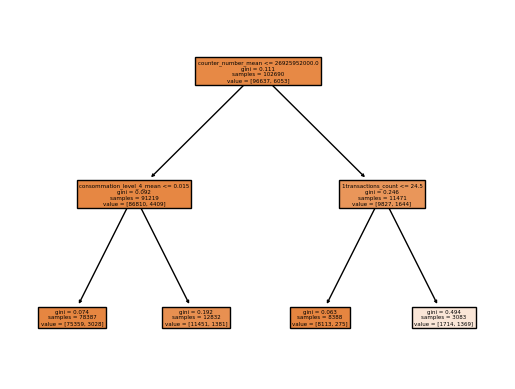

In [28]:
#Decision Tree
#Single tree with limited depth 3 to verify feature importance plot
tree = DecisionTreeClassifier(criterion = "gini", max_depth=2) 
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print(classification_report(y_test, y_pred_tree))
dectree_plot = plot_tree(tree, feature_names=X_train.columns, filled=True)

## Optimizing our first model: Decision Tree

We tried to first optimize the hyperparameters for a single decision tree to use them in a next step for random forest.
However, not much improvement could be generated. A single decision tree tends to overfit too fast.

In [29]:
#First initial randomized search for hyperparameter tuning  on single decision tree
'''params_dict = {
    'criterion' : ['gini', 'entropy'], 
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [20, 50, 100],
}

rgs = RandomizedSearchCV(estimator=tree, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)
rgs.fit(X_train, y_train)
rgs.best_estimator_, rgs.best_score_'''


"params_dict = {\n    'criterion' : ['gini', 'entropy'], \n    'max_depth': [10, 20, 30, 40, 50, None],\n    'max_features': ['auto', 'sqrt'],\n    'min_samples_leaf': [5, 10, 15],\n    'min_samples_split': [20, 50, 100],\n}\n\nrgs = RandomizedSearchCV(estimator=tree, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)\nrgs.fit(X_train, y_train)\nrgs.best_estimator_, rgs.best_score_"

Optimized parameters from randomizedsearch on single decision tree:
* random_state=42
* max_depth=30
* max_features='sqrt'
* min_samples_leaf=5
* min_samples_split=20, n_jobs=-1, verbose = 1

### Further opimization: Random Forest

In [30]:
#Optimization of RandomForest with optimized parameters from RandomizedSearch for single decision tree
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=30, max_features='sqrt', min_samples_leaf=5,
                        min_samples_split=20, n_jobs=-1, verbose = 1)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print(classification_report(y_test, y_pred_rf))

# saving f1 score to dictionary for comparison
model_results['Random_Forest_100n,sqrt,optparam'] = classification_report(y_test, y_pred_rf, output_dict=True)['1.0']['f1-score']

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.9s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.1s finished


              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     24160
         1.0       0.65      0.10      0.17      1513

    accuracy                           0.94     25673
   macro avg       0.80      0.55      0.57     25673
weighted avg       0.93      0.94      0.92     25673



Optimized parameters from single decision tree did not improve randomforest outcome.
So we will run a randomizedSearch on Random Forest.

### RandomizedSearchCV on Random Forest

In [31]:
# Running hyperparameter tuning on Random Forest
'''params_dict = {
    'n_estimators' : [50, 100, 500], 
    'criterion' : ['gini', 'entropy'], 
    'max_depth': [10, 20, 30, 40, 50, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [5, 10, 15],
    'min_samples_split': [20, 50, 100],
}

rgs = RandomizedSearchCV(estimator=rf, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)
rgs.fit(X_train, y_train)
rgs.best_estimator_, rgs.best_score_'''

"params_dict = {\n    'n_estimators' : [50, 100, 500], \n    'criterion' : ['gini', 'entropy'], \n    'max_depth': [10, 20, 30, 40, 50, None],\n    'max_features': ['auto', 'sqrt'],\n    'min_samples_leaf': [5, 10, 15],\n    'min_samples_split': [20, 50, 100],\n}\n\nrgs = RandomizedSearchCV(estimator=rf, param_distributions=params_dict, n_iter=50, scoring='f1', n_jobs=-1, random_state=16, return_train_score=True, verbose=2)\nrgs.fit(X_train, y_train)\nrgs.best_estimator_, rgs.best_score_"

best parameters of randomizedSearch for Random Forest: 
* criterion='entropy'
* max_depth=30
* max_features='sqrt'
* min_samples_leaf=10
* min_samples_split=20
* n_estimators=50, n_jobs=-1, random_state=42, verbose=1)
-----------


* f1 score = 0.1483850191554762
* It took 23 min to run. 

In [35]:
# saving f1 score to dictionary for comparison
model_results['Random_Forest_RandomSearch'] = 0.1483850191554762

Further optimization of the random forest could not improve the f1 score.
We will try to include boosting algorithms to improve the predictions.

## Boosting 

#### AdaBoost

In [38]:
#Test of AdaBoost Classifier
model=AdaBoostClassifier()
model.fit(X_train, y_train)
y_pred_ada=model.predict(X_test)
print(classification_report(y_test, y_pred_ada))

# saving f1 score to dictionary for comparison
model_results['AdaBoost'] = classification_report(y_test, y_pred_ada, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97     24160
         1.0       0.41      0.05      0.08      1513

    accuracy                           0.94     25673
   macro avg       0.67      0.52      0.53     25673
weighted avg       0.91      0.94      0.92     25673



#### Logit Boost

In [39]:
#Test of Logit Boost
model=LogitBoost()
model.fit(X_train, y_train)
y_pred_logit=model.predict(X_test)
print(classification_report(y_test, y_pred_logit))

# saving f1 score to dictionary for comparison
model_results['LogitBoost'] = classification_report(y_test, y_pred_logit, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.57      0.12      0.20      1513

    accuracy                           0.94     25673
   macro avg       0.76      0.56      0.59     25673
weighted avg       0.93      0.94      0.93     25673



#### XGBoost

In [37]:
#XGBoost Classifier
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred_xgb=model.predict(X_test)
print(classification_report(y_test, y_pred_xgb))

# saving f1 score to dictionary for comparison
model_results['XGBoost'] = classification_report(y_test, y_pred_xgb, output_dict=True)['1.0']['f1-score']

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.55      0.14      0.23      1513

    accuracy                           0.94     25673
   macro avg       0.75      0.57      0.60     25673
weighted avg       0.92      0.94      0.93     25673



XGBoost classifier performed best so far. So we further tuned the hyperparameters by running Randomized search.

### Randomized Search for XGBoost Classifier

In [44]:
#Randomized Search for XGBoost Classifier
'''params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500]}
clf = RandomizedSearchCV(estimator=XGBClassifier(),
                         param_distributions=params,
                         scoring='f1',
                         n_iter=50,
                         n_jobs=-1,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("f1", clf.best_score_)'''

'params = { \'max_depth\': [3, 5, 6, 10, 15, 20],\n           \'learning_rate\': [0.01, 0.1, 0.2, 0.3],\n           \'subsample\': np.arange(0.5, 1.0, 0.1),\n           \'colsample_bytree\': np.arange(0.4, 1.0, 0.1),\n           \'colsample_bylevel\': np.arange(0.4, 1.0, 0.1),\n           \'n_estimators\': [100, 500]}\nclf = RandomizedSearchCV(estimator=XGBClassifier(),\n                         param_distributions=params,\n                         scoring=\'f1\',\n                         n_iter=50,\n                         n_jobs=-1,\n                         verbose=1)\nclf.fit(X_train, y_train)\nprint("Best parameters:", clf.best_params_)\nprint("f1", clf.best_score_)'

Best Parameters for XGBoost:
* 'subsample': 0.7999999999999999
* 'n_estimators': 500
* 'max_depth': 5
* 'learning_rate': 0.3
* 'colsample_bytree': 0.8999999999999999
* 'colsample_bylevel': 0.4
-----
f1 score = 0.23321718823006926

In [45]:
# saving f1 score to dictionary for comparison
model_results['XGBoost_RandomSearch'] = 0.23321718823006926

#### Optimized Parameters for XGB Classifier - final model

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     24160
         1.0       0.52      0.15      0.24      1513

    accuracy                           0.94     25673
   macro avg       0.73      0.57      0.60     25673
weighted avg       0.92      0.94      0.93     25673



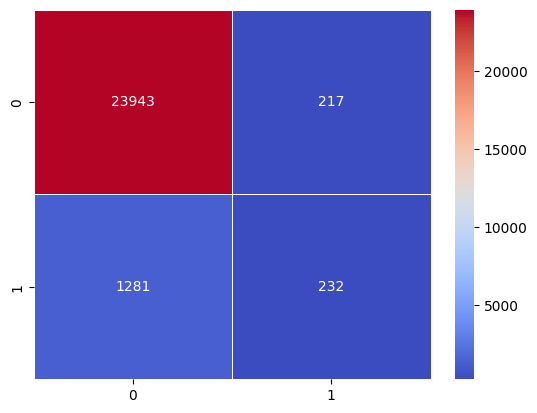

In [61]:
#model with best parameters from Randomized Search
best_model = XGBClassifier(subsample= 0.7999999999999999, 
        n_estimators= 500, 
        max_depth= 5,
        learning_rate= 0.3,
        colsample_bytree= 0.8999999999999999,
        colsample_bylevel= 0.4)
best_model.fit(X_train, y_train)
y_pred_best=best_model.predict(X_test)

# saving f1 score to dictionary for comparison
model_results['XGBoost_RandomSearch'] = classification_report(y_test, y_pred_best, output_dict=True)['1.0']['f1-score']

#Error Analysis of best estimator from randomized search by checking confusion matrix
cm=confusion_matrix(y_test, y_pred_best)
print(classification_report(y_test, y_pred_best))
sns.heatmap(cm, linewidths=.5, annot=True, cmap='coolwarm', fmt='.0f');


## Final Comparison of all tested models

In [56]:
#final comparison of f1 score of all models tested
for model, f1 in model_results.items():
    print('{} : {}'.format(model, f1))

baseline_model : 0.055701179554390565
logistic_regression : 0.11130729051717797
knn : 0.1778242677824268
tree : 0.21636876763875826
Naive_Bayes : 0.0
Random_Forest_100n,sqrt : 0.19058295964125563
Random_Forest_500n,sqrt : 0.18897637795275593
Random_Forest_500n,sqrt,weight : 0.1606936416184971
Random_Forest_500n,allfeat : 0.2058189655172414
Random_Forest_100n,sqrt,optparam : 0.17401259301659985
Random_Forest_RandomSearch : 0.1483850191554762
XGBoost : 0.22629649030906238
AdaBoost : 0.0819964349376114
LogitBoost : 0.2016348773841962
XGBoost_RandomSearch : 0.23321718823006926


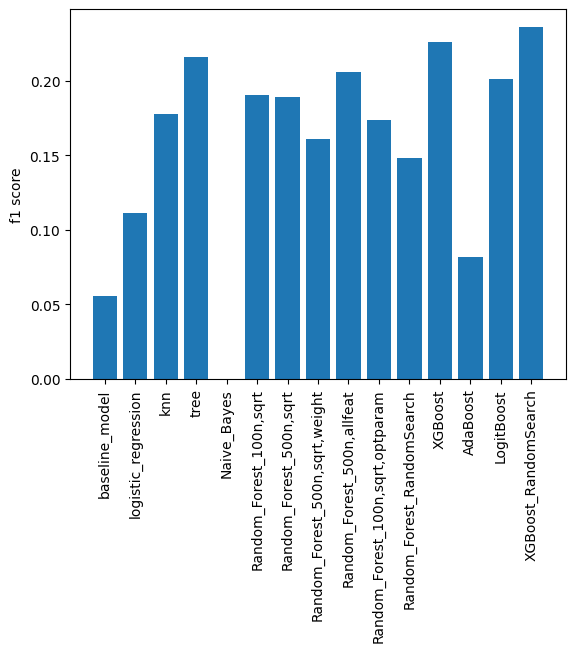

In [67]:
# PLotting f1 score for tested models
plt.bar(range(len(model_results)), model_results.values(), align='center')
plt.xticks(range(len(model_results)), list(model_results.keys()), rotation=90)
plt.ylabel('f1 score')
plt.show()

## Exporting final model